In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
from scipy.integrate import quad
from scipy.stats import norm

RK4_jit = IJ.RK4

In [4]:
K=9
m=6

In [5]:
def Bisection(f,r_a,r_b,eps =1e-5,arg=()):
    r_c = (r_a+r_b)/2
    num = 0 
    
    while abs(f(r_c,*arg))>eps:
        r_c = (r_a+r_b)/2
        if f(r_a,*arg)*f(r_c,*arg)>0:
            r_a = r_c
        else:
            r_b = r_c
        num+=1
        if num >50:
            print('Please select another section')
            return np.NAN
    print(f'count : {num}')
    return r_c

In [137]:
def g_n(x):
    return norm.pdf(x,0,1)

def r_lock1(r,K=K,m=m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return X*I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return X*I_l
    

def r_drift1(r,K=K,m=m,g=g_n):
    X = K*r
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -X/(m)*I_d

def r_main(r,K=K,m=m,g=g_n):
    rl = r_lock1(r,K=K,m=m,g=g_n)
    rd = 0#r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r



def r_mean(r,K=K,m=m,g=g_n):
    rl = r_lock1(r,K=K,m=m,g=g_n)
    rd = r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r

In [154]:
def g_sec(x,Or,Om):
    g = norm.pdf(x+Or,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<dO,1e-9,g)

In [161]:
def r_lock2(r,O_r,O_pm,K=K,m=m,g=g_sec):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
        return X*I_l

    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
        return X*I_l
    
def r_sec(r,O_r,O_pm,K=K,m=m,g=g_sec):
    rl = r_lock2(r,O_r,O_pm,K=K,m=m,g=g_sec)
    rd = 0#r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r

In [147]:
Opf = lambda r,K=K,m=m:  (4/np.pi)*np.sqrt(K*r/m)
Odf = lambda r,K=K,m=m:  K*r

In [76]:
norm.pdf(160,0,1)

0.0

In [170]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)

In [166]:
r_m_ = Bisection(r_mean,0.1,1,arg = (K,m,g_n))
print(r_m_)
# O_pm = norm.ppf(r_mean/2+0.5)
# O_pm
# O_pm
print('K,m',K,m)
# print('O_pm',O_pm)

count : 8
0.497265625
K,m 6 8


In [167]:
r_m = Bisection(r_main,0.1,1,arg = (K,m,g_n))
print(r_m)
O_pm = norm.ppf(r_m/2+0.5)
# O_pm
# O_pm
print('K,m',K,m)
print('O_pm',O_pm)

count : 15
0.6029266357421876
K,m 6 8
O_pm 0.8468596339939874


In [168]:
O_r = quad(norm.ppf,r_m/2+0.5,1)[0]/(0.5-r_m/2)
O_pm = norm.ppf(r_m/2+0.5)

In [177]:
sin_m = M_theta(0.2,O_r,0,K,m)
sin_m*K*r_m

-0.13765813584728423

In [ ]:
sin_m*

In [165]:
K=6
m=8

In [169]:
r_s = Bisection(r_sec,0.01,(1-r_m),eps=1e-3,arg = (O_r,O_pm,K,m,g_sec))
print(r_s)
O_ps = norm.ppf(r_s/2+0.5)
# O_pm
# O_pm
print('K,m',K,m)
print('O_pm',O_ps)

Please select another section
nan
K,m 6 8
O_pm nan


In [113]:
def g_sec(x,Or,Om):
    g = norm.pdf(x+O_r,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<dO,1e-9,g)

In [90]:
def mean_omega(x):
    return norm.ppf(x)

In [120]:
O_r = quad(norm.ppf,0.5+r_m/2,1)[0]/(0.5-r_m/2)
O_r

1.572200088528785

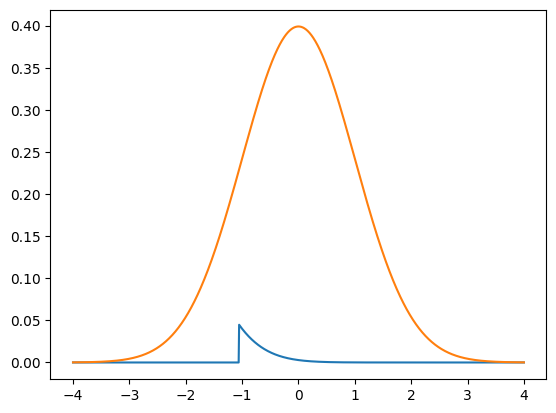

In [144]:
x = np.linspace(-4,4,1000)
plt.plot(x,g_sec(x+O_r,O_r,O_pm))
plt.plot(x,g_n(x))

In [117]:
np.mean(g_n(x))

0.12486722322311221

In [119]:
quad(g_sec,-5,10,args=(O_r,O_pm),epsabs=1e-10,limit=2000)

(0.018494655364454927, 2.9779655068615964e-11)

In [51]:
import sympy as sy

In [53]:
x = sy.symbols('x')
sy.integrate(g_n_new,x)

c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sympy\concrete\expr_with_limits.py:26: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'<function g_n_new at 0x000001CA8990E8E0>'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  function = sympify(function)


SympifyError: Sympify of expression 'could not parse '<function g_n_new at 0x000001CA8990E8E0>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)